## Numpy arrays and broadcasting

In [1]:
import numpy as np

In [2]:
my_list = ["Emmanuel", 1, 1., [1, 2]]

In [3]:
len(my_list)

4

In [4]:
print(my_list)
for element in my_list:
    print(type(element))

['Emmanuel', 1, 1.0, [1, 2]]
<class 'str'>
<class 'int'>
<class 'float'>
<class 'list'>


In [5]:
my_list[-1]

[1, 2]

In [6]:
my_list[1] = "abc"
print(my_list)

['Emmanuel', 'abc', 1.0, [1, 2]]


In [7]:
arr = np.array([1, 2, 5, -1])

In [8]:
arr

array([ 1,  2,  5, -1])

In [9]:
arr[2]
arr[2] = 6
arr

array([ 1,  2,  6, -1])

In [10]:
arr = np.array([1, 2, 5, "abc"])  # mixed datatypes

In [11]:
arr

array(['1', '2', '5', 'abc'], dtype='<U21')

In [12]:
arr  # numpy does not support mixed types
arr[0] += 1

TypeError: can only concatenate str (not "int") to str

In [13]:
long_list = list(range(10000))
%timeit sum(long_list)


23.2 μs ± 1.1 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
long_array = np.arange(10_000)  # synctactix sugar for long numbers
%timeit np.sum(long_array)  # much faster

1.92 μs ± 38.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [15]:
np.arange(10_000).dtype

dtype('int64')

In [16]:
my_2d_array = np.array([[0, 1, 2], [3, 4, 5]])

In [17]:
my_2d_array

array([[0, 1, 2],
       [3, 4, 5]])

In [18]:
my_2d_array.shape

(2, 3)

In [19]:
my_2d_array[1, 1]

np.int64(4)

In [20]:
print(my_2d_array[1, 0:3])
print(my_2d_array[1, :])


[3 4 5]
[3 4 5]


In [21]:
my_2d_array[:, -1]

array([2, 5])

In [22]:
my_2d_array

array([[0, 1, 2],
       [3, 4, 5]])

In [23]:
my_2d_array[:, 0:3:2]

array([[0, 2],
       [3, 5]])

In [24]:
my_2d_array[:, ::-1]

array([[2, 1, 0],
       [5, 4, 3]])

In [25]:
np.mean(my_2d_array)

np.float64(2.5)

In [26]:
np.mean(my_2d_array, axis=0)

array([1.5, 2.5, 3.5])

In [27]:
np.mean(my_2d_array, axis=1)

array([1., 4.])

In [28]:
np.zeros((5, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [29]:
np.ones((5, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [30]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [31]:
np.diag([3, 4, 5])

array([[3, 0, 0],
       [0, 4, 0],
       [0, 0, 5]])

In [32]:
init_arr = np.arange(12)
print(init_arr)
print(init_arr.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
(12,)


In [33]:
init_arr.reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
init_arr.reshape(3, 3)

ValueError: cannot reshape array of size 12 into shape (3,3)

In [37]:
init_arr.reshape(3, -1)  # same as (3, 12 / 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [38]:
init_arr.reshape(3, -1).T 

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [39]:
init_arr.reshape(5, -1)  # same as (5, 12 / 5)

ValueError: cannot reshape array of size 12 into shape (5,newaxis)

In [40]:
init_arr
print(init_arr.shape)

(12,)


In [41]:
init_arr.T

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
my_2d_array[0]  # same as my_2d_array[0, :]

array([0, 1, 2])

In [43]:
my_2d_array[0].shape

(3,)

In [44]:
arr = np.array([[1, 2, 3]])
print(arr)
print(arr.shape)

[[1 2 3]]
(1, 3)


In [45]:
arr.T  # transposing arrays of dim > 1 affects them 

array([[1],
       [2],
       [3]])

### Broadcasting

In [46]:
a = np.arange(10)
b = np.ones(10)  # way number 1

In [47]:
a + b

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [48]:
a + 1  # way number 2: can directly add int to array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [49]:
a * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [50]:
a *= 2  # (very roughly speaking, same as a = 2 * a)  (Warning, it's not the same)

In [51]:
a  # a has been modified in place

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [52]:
A = np.arange(12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [53]:
A + 10

array([[10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21]])

In [54]:
b = np.array([-1, -1, - 2, - 2])

In [55]:
A + b  # shape (3, 4) + shape (4,) ???

array([[-1,  0,  0,  1],
       [ 3,  4,  4,  5],
       [ 7,  8,  8,  9]])

In [56]:
A + np.array([b, b, b])

array([[-1,  0,  0,  1],
       [ 3,  4,  4,  5],
       [ 7,  8,  8,  9]])

In [57]:
np.array([b, b, b])

array([[-1, -1, -2, -2],
       [-1, -1, -2, -2],
       [-1, -1, -2, -2]])

In [58]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [59]:
c = np.array([1, 2, 3])
c

array([1, 2, 3])

In [60]:
A + c

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [61]:
X = np.arange(12).reshape(2, 2, 3)

In [62]:
X

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [63]:
X[0, 1, 1]

np.int64(4)

## Misc stuff

$$\sqrt{2} + \frac{1}{2}$$

In [64]:
# standard way to build lists:
values = []  # empty list
print(len(values))

for i in range(10):
    values.append(i)

0


In [65]:
print(values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [66]:
# list comprehension syntax:
values = [i for i in range(10)]
print(values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [67]:
odd_values = [i for i in range(10) if i % 2 == 1]
print(odd_values)

[1, 3, 5, 7, 9]


In [68]:
nested_list = [[1, 2, 3], [4, 5]]
flattened = [elem for sublist in nested_list for elem in sublist] 
# can chain for (same way you can have nested for loops)

In [69]:
flattened

[1, 2, 3, 4, 5]

In [70]:
v2 = []
for sublist in nested_list:
    for elem in sublist:
        v2.append(elem)
print(v2)

[1, 2, 3, 4, 5]


## Dictionaries

In [71]:
# system of key/value pairs
my_dict = {"a": "value 1", 
           "b": 3, 
           1: 10, 
           "1": 45,
          }
# can have (nearly) all data types as keys 
# and (exactly) any datatype as value

In [72]:
my_dict["a"]  # access is very fast (amortized O(1)) 

'value 1'

In [73]:
my_dict[1]

10

In [74]:
my_dict

{'a': 'value 1', 'b': 3, 1: 10, '1': 45}

In [75]:
my_dict.get("b", "foobar")

3

In [76]:
my_dict.get(1879798, "foobar")

'foobar'

In [77]:
my_dict[18] = 12  # sets a new key/value pair (or change existing value)

In [78]:
my_dict

{'a': 'value 1', 'b': 3, 1: 10, '1': 45, 18: 12}

In [79]:
my_dict[18] = 20
my_dict

{'a': 'value 1', 'b': 3, 1: 10, '1': 45, 18: 20}

In [80]:
del my_dict[18]
print(my_dict)

{'a': 'value 1', 'b': 3, 1: 10, '1': 45}


## Gapminder analysis

In [81]:
import pandas as pd

In [82]:
df = pd.read_csv("./data/gapminder_gdp_europe.csv", index_col=0)

In [83]:
df

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820
Croatia,3119.236520,4338.231617,5477.890018,6960.297861,9164.090127,11305.385170,13221.821840,13822.583940,8447.794873,9875.604515,11628.388950,14619.222720
Czech Republic,6876.140250,8256.343918,10136.867130,11399.444890,13108.453600,14800.160620,15377.228550,16310.443400,14297.021220,16048.514240,17596.210220,22833.308510
Denmark,9692.385245,11099.659350,13583.313510,15937.211230,18866.207210,20422.901500,21688.040480,25116.175810,26406.739850,29804.345670,32166.500060,35278.418740
Finland,6424.519071,7545.415386,9371.842561,10921.636260,14358.875900,15605.422830,18533.157610,21141.012230,20647.164990,23723.950200,28204.590570,33207.084400


In [84]:
df.shape  # like for a numpy array

(30, 12)

In [85]:
np.array(df)  # way more complex to process

array([[ 1601.056136 ,  1942.284244 ,  2312.888958 ,  2760.196931 ,
         3313.422188 ,  3533.00391  ,  3630.880722 ,  3738.932735 ,
         2497.437901 ,  3193.054604 ,  4604.211737 ,  5937.029526 ],
       [ 6137.076492 ,  8842.59803  , 10750.72111  , 12834.6024   ,
        16661.6256   , 19749.4223   , 21597.08362  , 23687.82607  ,
        27042.01868  , 29095.92066  , 32417.60769  , 36126.4927   ],
       [ 8343.105127 ,  9714.960623 , 10991.20676  , 13149.04119  ,
        16672.14356  , 19117.97448  , 20979.84589  , 22525.56308  ,
        25575.57069  , 27561.19663  , 30485.88375  , 33692.60508  ],
       [  973.5331948,  1353.989176 ,  1709.683679 ,  2172.352423 ,
         2860.16975  ,  3528.481305 ,  4126.613157 ,  4314.114757 ,
         2546.781445 ,  4766.355904 ,  6018.975239 ,  7446.298803 ],
       [ 2444.286648 ,  3008.670727 ,  4254.337839 ,  5577.0028   ,
         6597.494398 ,  7612.240438 ,  8224.191647 ,  8239.854824 ,
         6302.623438 ,  5970.38876  ,  7696.

In [86]:
df.head(n=6)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820
Croatia,3119.236520,4338.231617,5477.890018,6960.297861,9164.090127,11305.385170,13221.821840,13822.583940,8447.794873,9875.604515,11628.388950,14619.222720


In [87]:
df.tail(2)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Turkey,1969.100980,2218.754257,2322.869908,2826.356387,3450.69638,4269.122326,4241.356344,5089.043686,5678.348271,6601.429915,6508.085718,8458.276384
United Kingdom,9979.508487,11283.177950,12477.177070,14142.850890,15895.11641,17428.748460,18232.424520,21664.787670,22705.092540,26074.531360,29478.999190,33203.261280


In [88]:
df.sample(3)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Croatia,3119.236520,4338.231617,5477.890018,6960.297861,9164.090127,11305.38517,13221.82184,13822.58394,8447.794873,9875.604515,11628.38895,14619.22272
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.97448,20979.84589,22525.56308,25575.570690,27561.196630,30485.88375,33692.60508
Germany,7144.114393,10187.826650,12902.462910,14745.625610,18016.180270,20512.92123,22031.53274,24639.18566,26505.303170,27788.884160,30035.80198,32170.37442


### Accessing data inside a dataframe

In [89]:
df.head()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820


In [90]:
df.iloc[1, 2]  # integer-position based access, much like a numpy array

np.float64(10750.72111)

In [91]:
df.iloc[1, ::3]

gdpPercap_1952     6137.076492
gdpPercap_1967    12834.602400
gdpPercap_1982    21597.083620
gdpPercap_1997    29095.920660
Name: Austria, dtype: float64

In [92]:
# way number is using the index column
df.loc["Belgium", :]  # loc vs iloc

gdpPercap_1952     8343.105127
gdpPercap_1957     9714.960623
gdpPercap_1962    10991.206760
gdpPercap_1967    13149.041190
gdpPercap_1972    16672.143560
gdpPercap_1977    19117.974480
gdpPercap_1982    20979.845890
gdpPercap_1987    22525.563080
gdpPercap_1992    25575.570690
gdpPercap_1997    27561.196630
gdpPercap_2002    30485.883750
gdpPercap_2007    33692.605080
Name: Belgium, dtype: float64

In [93]:
df.loc["Belgium", "gdpPercap_1987"]

np.float64(22525.56308)

In [94]:
# to access just one 

In [95]:
df["Belgium"]  # not for rows

KeyError: 'Belgium'

In [ ]:
df["gdpPercap_1987"]  # this is OK for columns

In [96]:
# can extract several columns:
df[["gdpPercap_1987", "gdpPercap_1992"]]

,gdpPercap_1987,gdpPercap_1992
country,,
Albania,3738.932735,2497.437901
Austria,23687.826070,27042.018680
Belgium,22525.563080,25575.570690
Bosnia and Herzegovina,4314.114757,2546.781445
Bulgaria,8239.854824,6302.623438
Croatia,13822.583940,8447.794873
Czech Republic,16310.443400,14297.021220
Denmark,25116.175810,26406.739850
Finland,21141.012230,20647.164990


In [97]:
df.gdpPercap_1957  # can also access a single column like this, 
# but it doesn't "feel right" (works only if column name is a valid variable name)

country
Albania                    1942.284244
Austria                    8842.598030
Belgium                    9714.960623
Bosnia and Herzegovina     1353.989176
Bulgaria                   3008.670727
Croatia                    4338.231617
Czech Republic             8256.343918
Denmark                   11099.659350
Finland                    7545.415386
France                     8662.834898
Germany                   10187.826650
Greece                     4916.299889
Hungary                    6040.180011
Iceland                    9244.001412
Ireland                    5599.077872
Italy                      6248.656232
Montenegro                 3682.259903
Netherlands               11276.193440
Norway                    11653.973040
Poland                     4734.253019
Portugal                   3774.571743
Romania                    3943.370225
Serbia                     4981.090891
Slovak Republic            6093.262980
Slovenia                   5862.276629
Spain            

In [98]:
df.head(4)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803


In [99]:
df.iloc[0:2]

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.00391,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.42230,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700


In [100]:
# slicing with loc: 
df.loc["Albania":"Belgium"]  # here the last one is included

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.00391,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.42230,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.97448,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080


In [101]:
# slicing with loc: 
df.loc[:, "gdpPercap_1952":"gdpPercap_1957"]  # here the last one is included

,gdpPercap_1952,gdpPercap_1957
country,,
Albania,1601.056136,1942.284244
Austria,6137.076492,8842.598030
Belgium,8343.105127,9714.960623
Bosnia and Herzegovina,973.533195,1353.989176
Bulgaria,2444.286648,3008.670727
Croatia,3119.236520,4338.231617
Czech Republic,6876.140250,8256.343918
Denmark,9692.385245,11099.659350
Finland,6424.519071,7545.415386


In [102]:
df.loc[:, "gdpPercap_1952":"gdpPercap_1957"].min()  # only across columns by default

gdpPercap_1952     973.533195
gdpPercap_1957    1353.989176
dtype: float64

In [103]:
np.random.randn(3, 4).min()  # different because homogeneous data

np.float64(-1.8781774072921196)

In [104]:
subset = df.loc["Italy":"Poland", "gdpPercap_1952":"gdpPercap_1957"]
subset.head()

,gdpPercap_1952,gdpPercap_1957
country,,
Italy,4931.404155,6248.656232
Montenegro,2647.585601,3682.259903
Netherlands,8941.571858,11276.193440
Norway,10095.421720,11653.973040
Poland,4029.329699,4734.253019


In [105]:
mask = subset > 4500  # returns a boolean mask
mask

,gdpPercap_1952,gdpPercap_1957
country,,
Italy,True,True
Montenegro,False,False
Netherlands,True,True
Norway,True,True
Poland,False,True


In [106]:
subset[mask]

,gdpPercap_1952,gdpPercap_1957
country,,
Italy,4931.404155,6248.656232
Montenegro,NaN,NaN
Netherlands,8941.571858,11276.193440
Norway,10095.421720,11653.973040
Poland,NaN,4734.253019


In [107]:
subset.min()

gdpPercap_1952    2647.585601
gdpPercap_1957    3682.259903
dtype: float64

In [108]:
subset[mask].min()

gdpPercap_1952    4931.404155
gdpPercap_1957    4734.253019
dtype: float64

In [109]:
np.min(np.array([1, 2., np.nan]))
np.nanmin(np.array([1, 2., np.nan]))

np.float64(1.0)

In [110]:
np.nan <= 1

False

In [111]:
subset[subset >= 5_000].mean()  # nan is ingored by min, max, sum, mean...

gdpPercap_1952    9518.496789
gdpPercap_1957    9726.274237
dtype: float64

In [112]:
 df.mean()

gdpPercap_1952     5661.057435
gdpPercap_1957     6963.012816
gdpPercap_1962     8365.486814
gdpPercap_1967    10143.823757
gdpPercap_1972    12479.575246
gdpPercap_1977    14283.979110
gdpPercap_1982    15617.896551
gdpPercap_1987    17214.310727
gdpPercap_1992    17061.568084
gdpPercap_1997    19076.781802
gdpPercap_2002    21711.732422
gdpPercap_2007    25054.481636
dtype: float64

In [113]:
mask_higher = df > df.mean()  # broadcasting is happening here under the hood
mask_higher

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,False,False,False,False,False,False,False,False,False,False,False,False
Austria,True,True,True,True,True,True,True,True,True,True,True,True
Belgium,True,True,True,True,True,True,True,True,True,True,True,True
Bosnia and Herzegovina,False,False,False,False,False,False,False,False,False,False,False,False
Bulgaria,False,False,False,False,False,False,False,False,False,False,False,False
Croatia,False,False,False,False,False,False,False,False,False,False,False,False
Czech Republic,True,True,True,True,True,True,False,False,False,False,False,False
Denmark,True,True,True,True,True,True,True,True,True,True,True,True
Finland,True,True,True,True,True,True,True,True,True,True,True,True


In [114]:
mask_higher.mean(axis=1)

country
Albania                   0.000000
Austria                   1.000000
Belgium                   1.000000
Bosnia and Herzegovina    0.000000
Bulgaria                  0.000000
Croatia                   0.000000
Czech Republic            0.500000
Denmark                   1.000000
Finland                   1.000000
France                    1.000000
Germany                   1.000000
Greece                    0.333333
Hungary                   0.000000
Iceland                   1.000000
Ireland                   0.333333
Italy                     0.500000
Montenegro                0.000000
Netherlands               1.000000
Norway                    1.000000
Poland                    0.000000
Portugal                  0.000000
Romania                   0.000000
Serbia                    0.000000
Slovak Republic           0.000000
Slovenia                  0.333333
Spain                     0.333333
Sweden                    1.000000
Switzerland               1.000000
Turkey      

## Plots 


In [115]:
import matplotlib.pyplot as plt

In [116]:
1
a = 1 + 1 

Text(0, 0.5, 'position (km)')

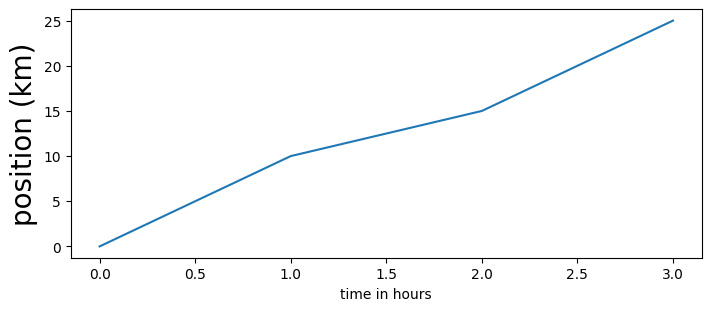

In [117]:
time = [0, 1, 2, 3]
position = [0, 10, 15, 25]

plt.figure(figsize=(7, 3), constrained_layout=True)
plt.plot(time, position)  # can also use scatter
plt.xlabel("time in hours")
plt.ylabel("position (km)", fontsize=20)
# plt.title("Position as function of time")  # not very useful

Text(0, 0.5, 'position (km)')

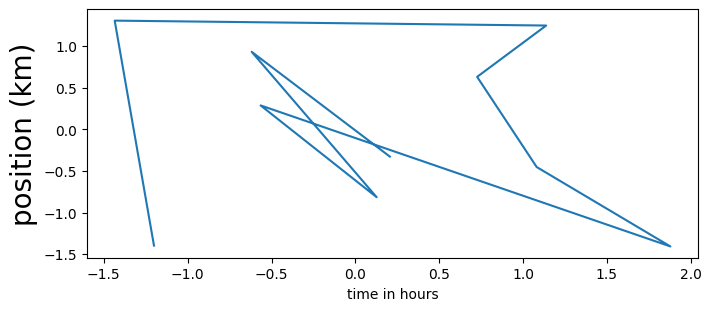

In [118]:
time = np.random.randn(10)
position = np.random.randn(10)

plt.figure(figsize=(7, 3), constrained_layout=True)
plt.plot(time, position)  # can also use scatter
plt.xlabel("time in hours")
plt.ylabel("position (km)", fontsize=20)
# plt.title("Position as function of time")  # not very useful

In [119]:
df.columns

Index(['gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967',
       'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987',
       'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007'],
      dtype='object')

In [120]:
years = [] 
for element in df.columns:
    years.append(element[-4:])
print(years)

['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992', '1997', '2002', '2007']


In [121]:
years = [elem[-4:] for elem in df.columns]  # list comprehension   (listcomp)
print(years)

['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992', '1997', '2002', '2007']


In [122]:
year_index = df.columns.str.replace("gdpPercap_", "").astype(int)  # weird syntax
year_index

Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007], dtype='int64')

In [123]:
df.columns = year_index

In [124]:
df.head()

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820


<Axes: >

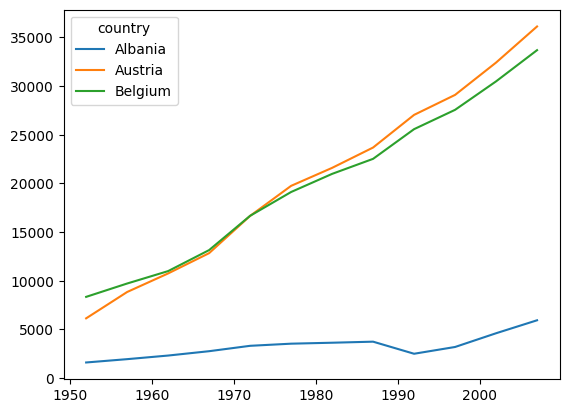

In [125]:
df.loc[:"Belgium"].T.plot()

<Axes: xlabel='France', ylabel='Belgium'>

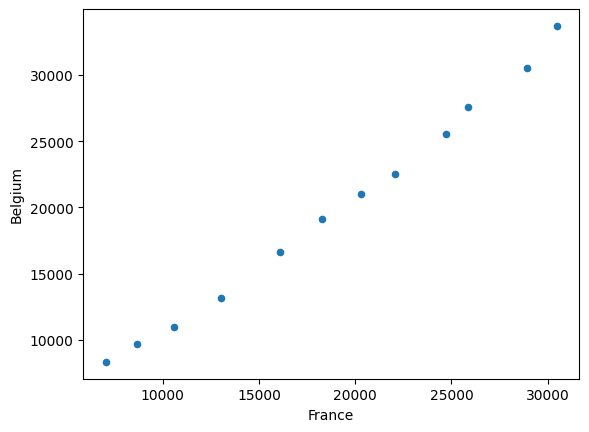

In [126]:
df.T.plot.scatter(x="France", y="Belgium")

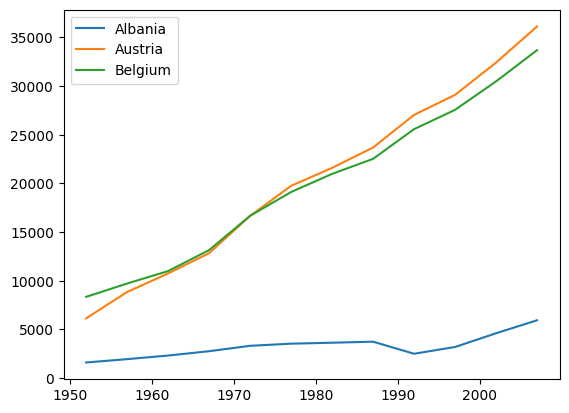

In [127]:
values = np.array(df)[:3]
plt.plot(df.columns, values.T, label=df.index[:3])
plt.legend(loc="best")
plt.savefig("gdps.pdf")

In [128]:
from matplotlib import colormaps
tab10 = colormaps["tab10"]

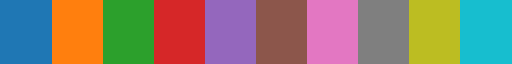

In [129]:
tab10

In [130]:
tab10(1)

(np.float64(1.0),
 np.float64(0.4980392156862745),
 np.float64(0.054901960784313725),
 np.float64(1.0))

In [131]:
import matplotlib
matplotlib.__version__

'3.9.2'

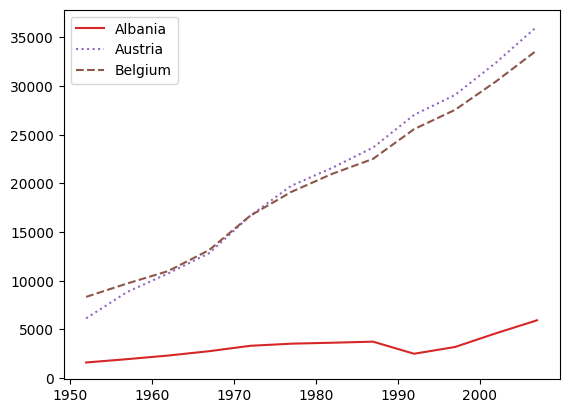

In [132]:
years = df.columns
linestyles = ['-', ':', '--']

for idx in range(3):
    gdps = df.iloc[idx]
    country = df.index[idx]
    plt.plot(years, gdps, label=country, linestyle=linestyles[idx], c=tab10(idx + 3)) 

plt.legend()